In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
import math 

In [26]:
# Load the data into a dataframe

Mode = ["Rotated", "Rot30"]

data = pd.read_csv(f"../Files/{Mode[0]}/EventInfo_merge_{Mode[1]}.csv", delimiter = ",", names = ["event", "x", "y", "z", "t"])

# Cut the first bin
data = data[data['t'] > 200]
display(data)

# Load the data into a dataframe
meta = pd.read_csv(f"../Files/{Mode[0]}/Metadata_merge_{Mode[1]}.csv", delimiter = ",", names = ["event","electrons","ions","elastic","ionisations","attachment","inelastic","excitation","top","bottom","start x","start y","start z", "start E", "end E"])
 
display(meta)


event      x      y      z         t
0            21  0.370  1.566  0.521   829.642
1            21  0.374  1.563  0.510   885.323
2            21  0.373  1.564  0.508   890.424
3            21  0.375  1.561  0.507   899.119
4            21  0.374  1.559  0.501   917.301
...         ...    ...    ...    ...       ...
80300563  20000  0.888 -1.157 -0.486  4319.770
80300564  20000  0.888 -1.157 -0.486  4319.970
80300565  20000  0.888 -1.157 -0.487  4320.240
80300566  20000  0.888 -1.157 -0.486  4320.330
80300567  20000  0.889 -1.156 -0.487  4321.210

[80296610 rows x 5 columns]

event  electrons  ions    elastic  ionisations  attachment  inelastic  \
0         21          1     0  372380191            0           0          0   
1         22          1     0  340407027            0           0          0   
2         23          1     0  359434229            0           0          0   
3         24          1     0  120294455            0           0          0   
4         25          1     0  343230337            0           0          0   
...      ...        ...   ...        ...          ...         ...        ...   
79995  19996          1     0  350254101            0           0          0   
79996  19997          1     0  407713293            0           0          0   
79997  19998          1     0  339809932            0           0          0   
79998  19999          1     0  333897208            0           0          0   
79999  20000          1     0  343946001            0           0          0   

       excitation  top  bottom   start x   start y  start z   start E  \
0            1022    0       1  0.364861  1.603884     0.65  1.000000   
1            1128    0       1  1.307567  0.502964     0.65  8.679514   
2            1067    0       1 -1.921417  0.581072     0.65  3.080222   
3             214    0       0  0.793876  1.864870     0.65  3.650185   
4            1135    0       1 -0.502261  0.715664     0.65  6.989269   
...           ...  ...     ...       ...       ...      ...       ...   
79995        1112    0       1  1.444127  0.244449     0.65  4.545950   
79996         918    0       1  0.417137  1.442304     0.65  3.041324   
79997        1148    0       1  1.073237  0.351678     0.65  4.371784   
79998        1182    0       1  1.411028 -1.203743     0.65  4.054145   
79999        1151    0       1  0.928141 -1.238297     0.65  3.312836   

          end E  
0      4.435090  
1      7.908820  
2      6.846751  
3      2.562451  
4      1.300633  
...         ...  
79995  0.445035  
79996  3.326351  
79997  4.006618  
79998  8.204409  
79999  8.381229  

[80000 rows x 15 columns]

In [3]:
# Print some additional info
print("ions: ", meta['ions'].sum())
print("Ionisations: ", meta['ionisations'].sum())
print("attachment: ", meta['attachment'].sum())
print("inelastic: ", meta['inelastic'].sum())
print("top: ", meta['top'].sum())
print("bottom: ", meta['bottom'].sum())
print("Mean VuV: ", meta['excitation'].mean())
print("STD/Mean VuV: ", 100*meta['excitation'].std()/meta['excitation'].mean())


ions:  16
Ionisations:  0
attachment:  80300568
inelastic:  1699
top:  102.60103200000003
bottom:  -119.28758900000001
Mean VuV:  0.9590125
STD/Mean VuV:  20.778531671316134


In [4]:
# Bin the scatters in time
tmin=0
tmax=6000
tbw=200

tot_tracks = (len(data['event'].unique()))

tbins = np.arange(tmin, tmax+tbw, tbw)
tbins_centre = np.arange(tmin+tbw/2, tmax+tbw/2, tbw)


data['t'] = pd.cut(x=data['t'], bins=tbins,labels=tbins_centre, include_lowest=True)
display(data)

# Now average over the events
avg = data.groupby(['t']).count()
avg = avg.fillna(0)
avg.reset_index(inplace=True) 
display(avg)

std = data.groupby(['t']).std()
std = std.fillna(0)
std.reset_index(inplace=True) 
display(std)


event      x      y      z       t
0            21  0.370  1.566  0.521   900.0
1            21  0.374  1.563  0.510   900.0
2            21  0.373  1.564  0.508   900.0
3            21  0.375  1.561  0.507   900.0
4            21  0.374  1.559  0.501   900.0
...         ...    ...    ...    ...     ...
80300563  20000  0.888 -1.157 -0.486  4300.0
80300564  20000  0.888 -1.157 -0.486  4300.0
80300565  20000  0.888 -1.157 -0.487  4300.0
80300566  20000  0.888 -1.157 -0.486  4300.0
80300567  20000  0.889 -1.156 -0.487  4300.0

[80296610 rows x 5 columns]

t    event        x        y        z
0    100.0        0        0        0        0
1    300.0      256      256      256      256
2    500.0     2405     2405     2405     2405
3    700.0    31977    31977    31977    31977
4    900.0   294981   294981   294981   294981
5   1100.0  1232176  1232176  1232176  1232176
6   1300.0  2616319  2616319  2616319  2616319
7   1500.0  3702981  3702981  3702981  3702981
8   1700.0  4277517  4277517  4277517  4277517
9   1900.0  4542784  4542784  4542784  4542784
10  2100.0  4636144  4636144  4636144  4636144
11  2300.0  4665294  4665294  4665294  4665294
12  2500.0  4677315  4677315  4677315  4677315
13  2700.0  4679606  4679606  4679606  4679606
14  2900.0  4679288  4679288  4679288  4679288
15  3100.0  4671378  4671378  4671378  4671378
16  3300.0  4667740  4667740  4667740  4667740
17  3500.0  4670429  4670429  4670429  4670429
18  3700.0  4674837  4674837  4674837  4674837
19  3900.0  4726701  4726701  4726701  4726701
20  4100.0  5237780  5237780  5237780  5237780
21  4300.0  6882287  6882287  6882287  6882287
22  4500.0  3350069  3350069  3350069  3350069
23  4700.0   880138   880138   880138   880138
24  4900.0   257617   257617   257617   257617
25  5100.0   110770   110770   110770   110770
26  5300.0    61943    61943    61943    61943
27  5500.0    35036    35036    35036    35036
28  5700.0    18924    18924    18924    18924
29  5900.0     8175     8175     8175     8175

t         event         x         y         z
0    100.0      0.000000  0.000000  0.000000  0.000000
1    300.0  23713.990996  1.215687  0.909377  0.009410
2    500.0  22752.588572  1.269523  1.041467  0.009339
3    700.0  23081.534003  1.166483  1.035610  0.010633
4    900.0  23143.212368  1.084927  1.024988  0.014195
5   1100.0  23103.975429  1.048757  1.024414  0.020210
6   1300.0  23096.027967  1.032138  1.023137  0.026130
7   1500.0  23097.861442  1.026199  1.020675  0.030419
8   1700.0  23099.543123  1.023203  1.019321  0.032934
9   1900.0  23094.311674  1.022906  1.018460  0.034239
10  2100.0  23082.374239  1.022772  1.017450  0.034913
11  2300.0  23094.951461  1.023452  1.016767  0.035286
12  2500.0  23092.219459  1.023221  1.015666  0.035591
13  2700.0  23095.777200  1.023479  1.014241  0.035662
14  2900.0  23092.178741  1.023010  1.013386  0.035781
15  3100.0  23098.450790  1.022123  1.012178  0.036236
16  3300.0  23086.768866  1.021878  1.011011  0.036505
17  3500.0  23093.914031  1.020987  1.009999  0.036753
18  3700.0  23096.166005  1.019626  1.009150  0.037045
19  3900.0  23097.684699  1.018341  1.008366  0.037667
20  4100.0  23122.727516  1.014545  1.007126  0.041898
21  4300.0  23103.004706  1.012315  1.012226  0.036409
22  4500.0  23033.652545  1.023626  1.038524  0.026699
23  4700.0  23114.251682  1.032535  1.055949  0.022463
24  4900.0  23148.655775  1.018917  1.064670  0.017260
25  5100.0  22945.790692  1.039488  1.050195  0.012510
26  5300.0  22893.177271  1.037863  1.032067  0.010032
27  5500.0  22453.236286  1.034874  1.034885  0.008662
28  5700.0  23704.227000  1.059540  1.035640  0.006462
29  5900.0  22304.798371  1.031579  1.066298  0.004899

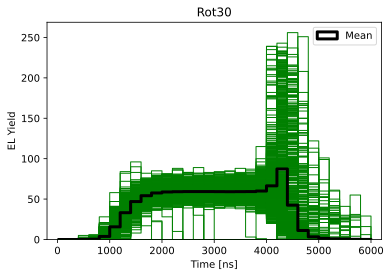

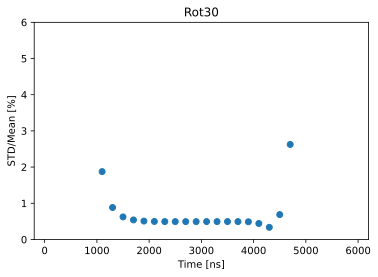

In [5]:
# Make a plot of the timing profile of the EL emission
plt.figure()

# New dataframe for storing binned hist details
data_binned = pd.DataFrame()

count = 0

for i in data['event'].unique():
    if (count > 1000): break

    # Plot the data
    counts, bins, bars  = plt.hist(data[data["event"] == i]['t'], bins = np.arange(tmin, tmax+tbw, tbw), histtype="step", color = "green")
    # counts, edges  = np.histogram(data[data["event"] == i]['t'], bins = np.arange(tmin, tmax+tbw, tbw))
    
    # Save binned info to a histogram
    temp_df =  pd.DataFrame({'event': np.ones(len(counts))*i,
                   'Yield': counts,
                   'Time': tbins_centre })
    
    data_binned = pd.concat([data_binned,temp_df])
    count+=1

plt.hist(avg['t'], weights = avg['event']/tot_tracks,bins = np.arange(tmin, tmax+tbw, tbw), histtype="step", color = "black", linewidth=3, label="Mean")
plt.xlim(-200, 6200)

plt.xlabel("Time [ns]")
plt.ylabel("EL Yield")
plt.title(Mode[1])
plt.legend()
plt.savefig("../Plots/"+Mode[1]+"/Yield_vs_Time.pdf")
# plt.title(f"Total VUV:{nVuV}")

plt.figure()
plt.scatter(avg['t'], 100*std['event']/avg['event'])
plt.xlabel("Time [ns]")
plt.ylabel("STD/Mean [%]")
plt.title(Mode[1])
plt.xlim(-200, 6200)
plt.ylim(0, 6 )
plt.savefig("../Plots/"+Mode[1]+"/Fluctuations_vs_Time.pdf")


(array([    0.,   236.,  2107., 20418., 63461., 76963., 78344., 78271.,
        78103., 77932., 77791., 77664., 77527., 77421., 77314., 77208.,
        77110., 77008., 76937., 76864., 76776., 75960., 55173., 28503.,
        10268.,  4330.,  2653.,  1636.,   964.,   449.]),
 array([   0,  200,  400,  600,  800, 1000, 1200, 1400, 1600, 1800, 2000,
        2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200,
        4400, 4600, 4800, 5000, 5200, 5400, 5600, 5800, 6000]),
 [<matplotlib.patches.Polygon at 0x13634b490>])

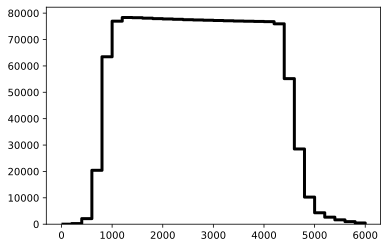

In [6]:
# Make a plot of the summed EL Yield over time
summed = data[['event', 't']]
summed = summed.drop_duplicates().groupby('t').count()
summed.reset_index(inplace=True) 
plt.figure()
plt.hist(summed['t'], weights = summed['event'],bins = np.arange(tmin, tmax+tbw, tbw), histtype="step", color = "black", linewidth=3)
# display(test)

In [7]:
display(data_binned[data_binned['Yield'] > 160])
evt_highY = data_binned[data_binned['Yield'] > 120]['event'].unique()

fig = plt.figure()
ax = fig.add_subplot()

for i in evt_highY:
    ax.plot(data[data["event"] == i]['y'], data[data["event"] == i]['z'])



event  Yield    Time
20     22.0  175.0  4100.0
21     25.0  168.0  4300.0
22     26.0  165.0  4500.0
22     33.0  190.0  4500.0
21     35.0  185.0  4300.0
..      ...    ...     ...
21  20865.0  162.0  4300.0
22  20868.0  214.0  4500.0
21  20869.0  177.0  4300.0
21  20870.0  214.0  4300.0
22  20875.0  195.0  4500.0

[267 rows x 3 columns]

Text(0, 0.5, 'z [cm]')

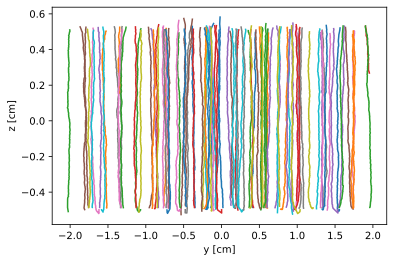

In [8]:
# Make a plot of the timing profile of the EL emission
fig = plt.figure()
ax = fig.add_subplot()

count = 0
for i in data['event'].unique():
    if (count > 100): break
    ax.plot(data[data["event"] == i]['y'], data[data["event"] == i]['z'])
    count+=1

# ax.set_zlim(-0.8, 0.7)
# ax.set_xlim(-0.7, 0.7)
# ax.set_ylim(-0.7, 0.7)
# ax.invert_xaxis()

ax.set_xlabel("y [cm]")
ax.set_ylabel("z [cm]")
# ax.set_zlabel("z [cm]")


In [62]:
req_par = ['excitation', 'start x', 'start y']
meta_slim = meta[req_par]
pd.options.mode.chained_assignment = None  # default='warn'

# Flip the y axis
# meta_slim["start y"] = -meta_slim["start y"]

# Convert to mm before writing to file
meta_slim["start x"] = meta_slim["start x"].astype(float)*10
meta_slim["start y"] = meta_slim["start y"].astype(float)*10

# Shift the values to align with the center of the geometry not the generated disk
meta_slim["start x"] = meta_slim["start x"]+11
meta_slim["start y"] = meta_slim["start y"]+12.5

# Remove events generated close to the edge of the geometry where the field is not
# very well defined. 
meta_slim = meta_slim[meta_slim["excitation"] > 890 ]

hexsize = 24.446 # mm
print(hexsize)

# Calculate the nearest hexagon centre to the point
def hex_round(q,r,s,mode):
    qi = int(round(q))
    ri = int(round(r))
    si = int(round(s))
    q_diff = abs(qi - q)
    r_diff = abs(ri - r)
    s_diff = abs(si - s)
    
    if q_diff > r_diff and q_diff > s_diff:
        qi = -ri - si
    else:
        if r_diff > s_diff:
            ri = -qi - si
        else:
            si = -qi - ri
    
    if (mode == "q"):
        return qi
    elif (mode == "r"):
        return ri
    else:
        return si

# Calculate q and r values for meta_slim table
meta_slim["q"] = (meta_slim["start x"] * np.sqrt(3)/3.0 - 1.0/3.0*meta_slim["start y"]) / hexsize 
meta_slim["r"] = (2.0/3.0)*meta_slim["start y"] / hexsize
meta_slim["s"] = -meta_slim["q"] - meta_slim["r"]

# Calculate the multiple of q and r of the hexagon
meta_slim["nq"] = meta_slim.apply(lambda df: hex_round(df["q"], df["r"], df["s"], "q"), axis = "columns", result_type='expand' )
meta_slim["nr"] = meta_slim.apply(lambda df: hex_round(df["q"], df["r"], df["s"], "r"), axis = "columns", result_type='expand' )

# Shift the values to unit cell
meta_slim["q"] = meta_slim["q"] - meta_slim["nq"]
meta_slim["r"] = meta_slim["r"] - meta_slim["nr"]

# Drop columns that are now not needed
meta_slim = meta_slim.drop(columns = ["s", "nq","nr", "start x", "start y"])


# Create polar coordinate system
meta_slim["start x"] = hexsize * (np.sqrt(3)*meta_slim["q"].astype(float) + 0.5*np.sqrt(3)*meta_slim["r"].astype(float))
meta_slim["start y"] = hexsize * 1.5*meta_slim["r"].astype(float)
meta_slim["phi"] = np.rad2deg(np.arctan2(meta_slim["start y"], meta_slim["start x"]))
meta_slim["R"] = np.sqrt(meta_slim["start x"]*meta_slim["start x"] + meta_slim["start y"]*meta_slim["start y"])

# Shift all angles to unit cell value
meta_slim["phi"] = meta_slim["phi"] + 180
meta_slim["phi"] = meta_slim.apply(lambda df: 360 + df.phi if df.phi>0 and df.phi <= 30 else df.phi, axis = "columns")
meta_slim["phi"] = meta_slim.apply(lambda df: df.phi - 60*math.ceil((df.phi - 90) / 60) if df.phi > 90 else df.phi, axis = "columns")
display(meta_slim)


rdf = pd.DataFrame(np.repeat(meta_slim.to_numpy(), 2, axis = 0), columns=meta_slim.columns)
display(rdf)


# Define bins in q and r space
numbins = 50

bins_q, bw_q  = np.linspace(-1, +1, numbins, retstep=True)
bins_centre_q = np.linspace(-1+bw_q/2, 1+bw_q/2, numbins)[:-1]

bins_r, bw_r  = np.linspace(-1, +1, numbins, retstep=True)
bins_centre_r = np.linspace(-1+bw_r/2, 1+bw_r/2, numbins)[:-1]

# Now bin the data
meta_slim['q'] = pd.cut(x=meta_slim['q'], bins=bins_q,labels=bins_centre_q, include_lowest=True)
meta_slim['r'] = pd.cut(x=meta_slim['r'], bins=bins_r,labels=bins_centre_r, include_lowest=True)

# Now average over the events
meta_avg_ = meta_slim.groupby(['q', 'r']).mean()
meta_avg_ = meta_avg_.fillna(0)
meta_avg_.reset_index(inplace=True) 

# Kill all the rows that are empty
meta_avg = meta_avg_[meta_avg_['excitation'] != 0]

print(meta_slim['excitation'].mean())
avg_VuV = meta_slim['excitation'].mean()


# Convert q and r back to x and y values (now should be in unit cell)
meta_avg["x"] = hexsize * (np.sqrt(3)*meta_avg["q"].astype(float) + 0.5*np.sqrt(3)*meta_avg["r"].astype(float))
meta_avg["y"] = hexsize * 1.5*meta_avg["r"].astype(float)


# Write the map to a file
meta_avg.to_hdf(f"../Maps/unitcell_{Mode[1]}.h5","Yields", mode='w', format = "table")

display(meta_avg)

24.446


excitation         q         r    start x   start y        phi  \
0            1022 -0.043180 -0.221718  -6.522247  -8.13016  51.262416   
1            1128  0.329579 -0.521949   2.904813 -19.13936  38.630016   
2            1067 -0.443673  0.499351  -8.214170  18.31072  54.160955   
4            1135 -0.126858  0.536056   5.977390  19.65664  73.086002   
5            1127  0.366459 -0.177137  11.766350  -6.49542  31.099829   
...           ...       ...       ...        ...       ...        ...   
79995        1112  0.397080 -0.592449   4.270413 -21.72451  41.120909   
79996         918 -0.008801 -0.265782  -5.999487  -9.74596  58.384085   
79997        1148  0.294865 -0.563207   0.561513 -20.65222  31.557431   
79998        1182 -0.413269  0.012615 -17.231434   0.46257  58.462290   
79999        1151  0.477398  0.003192  20.281410   0.11703  60.330611   

               R  
0      10.423013  
1      19.358539  
2      20.068758  
4      20.545381  
5      13.440144  
...          ...  
79995  22.140252  
79996  11.444544  
79997  20.659852  
79998  17.237642  
79999  20.281748  

[68387 rows x 7 columns]

ValueError: Shape of passed values is (136774, 7), indices imply (68387, 7)

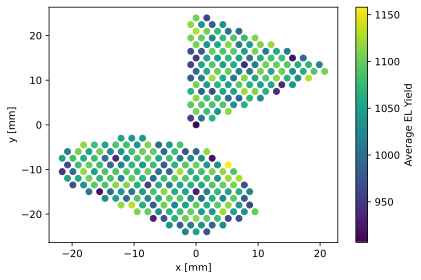

In [50]:
plt.figure()

# plt.scatter(meta_slim["start x"], meta_slim["start y"], c=meta_slim["excitation"])
sc = plt.scatter(meta_avg["x"], meta_avg["y"], c=meta_avg["excitation"])
plt.colorbar(sc, label='Average EL Yield')
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
# plt.xlim(-1.5, 1.5)
# plt.ylim(-2., 2.)
plt.tight_layout() 
plt.savefig("../Plots/"+Mode[1]+"/Yield_vs_XYpos.pdf")
plt.show()

In [137]:
# Get the start x and start y positions of events which are greater than 
# or less than some percentage of the mean
meta_avg['pct'] = 100*(meta_avg["excitation"] - avg_VuV)/avg_VuV
start_gt = meta_avg[meta_avg['pct'] > 1.5]
start_lt = meta_avg[meta_avg['pct'] < -1.5]


In [ ]:
# Make a side by side plot of the binned energy and the radial cut

plt.figure()

# Plot the total EL yield for each configuration

# Apply a radial cut
range_ = np.arange(0.05, 0.25, 0.05)
for c in range_:
    print("Calculating value: ", c)
    cutval = c
    rad_cut = data[ np.sqrt(data['x']*data['x'] + data['y']*data['y']) >= cutval]['event'].unique()
    filtered_data = data[~data.event.isin(rad_cut)]

    data_align_tot = filtered_data.pivot_table(columns=['event'], aggfunc='size').reset_index()
    data_align_tot.columns = ['event', 'Yield']
    plt.hist(data_align_tot['Yield'], bins = np.arange(1000, 1400, 10), histtype="step",density = True, linewidth=2, label='{0:.2f}'.format(c) )

plt.xlabel("EL Yield")
plt.ylabel("Counts")
plt.legend(loc = 'upper right')
plt.savefig("../Plots/"+Mode[1]+"/YieldTotal.pdf")

In [ ]:
# Merge dataframe to get start position in the data table
data_meta = data.merge( , on="event", how = 'inner')

# Now bin the data
data_meta['start x'] = pd.cut(x=data_meta['start x'], bins=bins,labels=bins_centre, include_lowest=True)
data_meta['start y'] = pd.cut(x=data_meta['start y'], bins=bins,labels=bins_centre, include_lowest=True)

data_meta = data_meta.drop(columns=["excitation", "electrons", "ions", "elastic", "ionisations", "attachment", "inelastic","top", "bottom", "start z", "start E", "end E"])


# Get all events with energy resolution greater/less than mean by some percentage
data_meta_gt = pd.merge(start_gt.reset_index(), data_meta, how='inner').set_index('index')
data_meta_lt = pd.merge(start_lt.reset_index(), data_meta, how='inner').set_index('index')


# Average over the time bins to get the average waveform in each mode
avg_gt = data_meta_gt.groupby(['t']).count()
avg_gt = avg_gt.fillna(0)
avg_gt.reset_index(inplace=True) 

avg_lt = data_meta_lt.groupby(['t']).count()
avg_lt = avg_lt.fillna(0)
avg_lt.reset_index(inplace=True) 


display(data_meta_gt)



In [ ]:
# Make a plot of the start x and start y which have a yield greater and less than the average
plt.figure()

start_gt = data_meta_gt.drop(columns = ["excitation", "pct", "event", "x", "y", "z","t"])
start_gt = start_gt.drop_duplicates()

plt.scatter(start_gt["start x"], start_gt["start y"])

plt.figure()

start_lt = data_meta_lt.drop(columns = ["excitation", "pct", "event", "x", "y", "z","t"])
start_lt = start_lt.drop_duplicates()

plt.scatter(start_lt["start x"], start_lt["start y"])

In [ ]:
plt.figure()
plt.hist(avg_gt['t'], weights = avg_gt['event'],bins = np.arange(tmin, tmax+tbw, tbw), histtype="step", color = "black", linewidth=3, label="Mean", density = True)
avg_lt['t_'] = avg_lt['t'].astype('float')
avg_lt['t_'] = avg_lt['t_']+200
plt.hist(avg_lt['t_'], weights = avg_lt['event'],bins = np.arange(tmin, tmax+tbw, tbw), histtype="step", color = "blue", linewidth=3, label="Mean", density = True)
plt.xlim(-200, 6200)

plt.xlabel("Time [ns]")
plt.ylabel("EL Yield")
